### drive mount & import library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

# Kcar-classification

Korean-car Classificiation models. (24,916 kcar images)

after uses: kcar detection model for autonomous vehicle

- image: 30 x 30 x 3
- data shape: 30 x 30 x 3 pixel columns & 1 label column
(.pkl file compressed by gzip format)

### preprocess

In [3]:
data = pd.read_pickle("./data/kcar.pkl", compression='gzip')
data.shape

(24916, 2701)

In [4]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠


In [5]:
# split pixel and label data
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X.shape, y.shape

((24916, 2700), (24916,))

G80스포츠


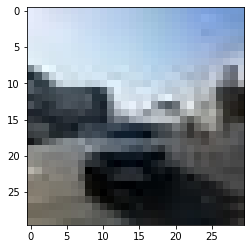

In [6]:
# plot data
print(y.iloc[0])
plt.imshow(X.iloc[0].values.astype(np.int).reshape(30,30,3))

소나타 하이브리드


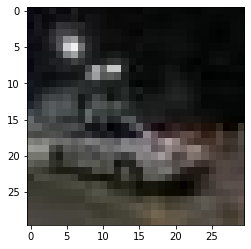

In [10]:
print(y.iloc[12000])
plt.imshow(X.iloc[12000].values.astype(np.int).reshape(30,30,3))

In [13]:
# Label Encoding
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([ 0,  0,  0, ..., 33, 33, 33])

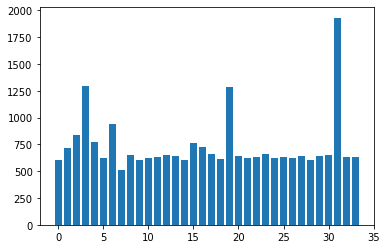

In [20]:
c = Counter(y)
plt.bar(c.keys(), c.values())
plt.show()

In [14]:
# Train, test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19932, 2700), (4984, 2700), (19932,), (4984,))

### Baseline models (Machine Learning)
- Logistic Regression
- Support Vector Machine
- Perceptron

In [21]:
def RunModel(model, X_train, y_train, X_test, y_test):
    clf = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return clf, pred

lr = LogisticRegression()
clf, y_pred = RunModel(lr, X_train, y_train, X_test, y_test)

svc = SVC()
clf_svc, y_pred_svc = RunModel(svc, X_train, y_train, X_test, y_test)

perc = Perceptron(tol=1e-3, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)
y_pred_svc = le.inverse_transform(y_pred_svc)
y_pred_perc = le.inverse_transform(y_pred_perc)

### Report

In [26]:
print("Model      :  Accuracy")
print("LR         :  %.4f" %metrics.accuracy_score(y_test, y_pred))
print("SVC        :  %.4f" %metrics.accuracy_score(y_test, y_pred_svc))
print("Perceptron :  %.4f" %metrics.accuracy_score(y_test, y_pred_perc))

Model      :  Accuracy
LR         :  0.1794
SVC        :  0.3959
Perceptron :  0.1258
